In [1]:
! pip install fastai
! pip install surprise

     |████████████████████████████████| 11.8 MB 3.8 MB/s 
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.1-cp37-cp37m-linux_x86_64.whl size=1619419 sha256=bf333b3d8dd4c4c0ed83ebfc3229e508c28ce9f22f0729ab5aa7dc5fc8f3bb1d
  Stored in directory: /root/.cache/pip/wheels/76/44/74/b498c42be47b2406bd27994e16c5188e337c657025ab400c1c
Successfully built scikit-surprise


In [2]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from itertools import cycle, islice
from pandas.plotting import parallel_coordinates
from sklearn.preprocessing import RobustScaler
from sklearn import metrics
from sklearn.model_selection import train_test_split
import random
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from surprise.model_selection import train_test_split
from scipy.sparse import coo_matrix, csr_matrix
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from surprise import Reader, Dataset, KNNBasic
from surprise.model_selection import cross_validate
from surprise import SVD


In [3]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [4]:
downloaded = drive.CreateFile({'id':"1C7yioHe3RDgbfZp3U8qTfZGeNR5_DJo4"})
downloaded.GetContentFile('category-lower-all-everything.txt')

### Loading of data

In [5]:
df_lower = pd.read_csv('category-lower-all-everything.txt', sep=":")
df_lower.head()

,Unnamed: 0,t_floral,t_stripe,t_dot,f_denim,f_leather,f_cotton,f_knit,f_pleated,s_fit,s_pencil,s_midi,s_mini,s_maxi,p_zipper,total
0,img/Mineral_Wash_Mini_Skirt/img_00000001.jpg,0,0,0,1,0,0,0,0,0,1,1,0,0,0,3
1,img/Mineral_Wash_Mini_Skirt/img_00000002.jpg,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,img/Mineral_Wash_Mini_Skirt/img_00000003.jpg,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
3,img/Mineral_Wash_Mini_Skirt/img_00000004.jpg,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
4,img/Mineral_Wash_Mini_Skirt/img_00000005.jpg,0,0,0,1,0,0,0,0,0,0,0,1,0,0,2


In [6]:
downloadedUpper = drive.CreateFile({'id':"1K5VK5yDoVqFRIbaY5KKaRApkK4up3h27"})
downloadedUpper.GetContentFile('category-upper-all-everything.txt')

In [7]:
df_upper = pd.read_csv('category-upper-all-everything.txt', sep=":")
df_upper.head()

,Unnamed: 0,t_floral,t_stripe,t_dot,f_lace,f_denim,f_chiffon,f_cotton,f_leather,f_fur,p_sleeveless,p_long-sleeve,p_collar,p_pocket,p_v-neck,p_button,p_hooded,p_zipper,total
0,img/Sheer_Pleated-Front_Blouse/img_00000001.jpg,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,img/Sheer_Pleated-Front_Blouse/img_00000002.jpg,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,img/Sheer_Pleated-Front_Blouse/img_00000003.jpg,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,2
3,img/Sheer_Pleated-Front_Blouse/img_00000004.jpg,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,img/Sheer_Pleated-Front_Blouse/img_00000005.jpg,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### Cleaning upper

In [8]:
del df_upper['total']
df_upper = df_upper.iloc[: , 1:]
df_upper

,t_floral,t_stripe,t_dot,f_lace,f_denim,f_chiffon,f_cotton,f_leather,f_fur,p_sleeveless,p_long-sleeve,p_collar,p_pocket,p_v-neck,p_button,p_hooded,p_zipper
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139704,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
139705,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
139706,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
139707,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [9]:
## Feature Scaling
StandardScaler = StandardScaler()
df_upper_standardscalar = StandardScaler.fit_transform(df_upper)
df_upper_standardscalar

array([[-0.23135464, -0.30765132, -0.13150515, ..., -0.1758789 ,
        -0.16378827, -0.16316516],
       [-0.23135464, -0.30765132, -0.13150515, ..., -0.1758789 ,
        -0.16378827, -0.16316516],
       [-0.23135464, -0.30765132, -0.13150515, ..., -0.1758789 ,
        -0.16378827, -0.16316516],
       ...,
       [-0.23135464, -0.30765132, -0.13150515, ..., -0.1758789 ,
        -0.16378827, -0.16316516],
       [-0.23135464, -0.30765132, -0.13150515, ..., -0.1758789 ,
        -0.16378827, -0.16316516],
       [-0.23135464, -0.30765132, -0.13150515, ..., -0.1758789 ,
        -0.16378827, -0.16316516]])

In [10]:
kmeans = KMeans(n_clusters=12, random_state=42).fit(df_upper_standardscalar)
labels = kmeans.labels_

In [11]:
df_upper['label_kmeans'] = labels
df_upper

,t_floral,t_stripe,t_dot,f_lace,f_denim,f_chiffon,f_cotton,f_leather,f_fur,p_sleeveless,p_long-sleeve,p_collar,p_pocket,p_v-neck,p_button,p_hooded,p_zipper,label_kmeans
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,11
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139704,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
139705,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
139706,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
139707,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [12]:
centers = kmeans.cluster_centers_

In [13]:
reduced_data = PCA(n_components=2).fit_transform(df_upper_standardscalar)
principalDf = pd.DataFrame(data = reduced_data
             , columns = ['principal component 1', 'principal component 2'])
principalDf

,principal component 1,principal component 2
0,-0.193123,-0.363904
1,-0.193123,-0.363904
2,-0.540412,0.959433
3,-0.193123,-0.363904
4,-0.193123,-0.363904
...,...,...
139704,-0.383868,2.062297
139705,-0.193123,-0.363904
139706,-0.193123,-0.363904
139707,-0.193123,-0.363904


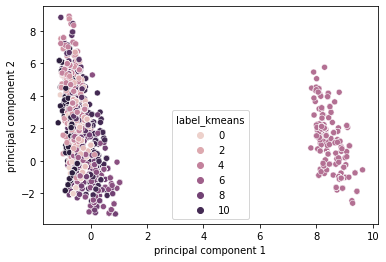

In [14]:
sns.scatterplot(x="principal component 1", y="principal component 2", hue=df_upper['label_kmeans'], data=principalDf)

### Lower

In [15]:
del df_lower['total']
df_lower = df_lower.iloc[: , 1:]
df_lower

,t_floral,t_stripe,t_dot,f_denim,f_leather,f_cotton,f_knit,f_pleated,s_fit,s_pencil,s_midi,s_mini,s_maxi,p_zipper
0,0,0,0,1,0,0,0,0,0,1,1,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,0,0,0,1,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58958,0,0,0,1,0,0,0,0,0,0,0,0,0,0
58959,0,0,0,1,0,0,0,0,0,0,0,0,0,0
58960,0,0,0,1,0,0,0,0,0,0,0,0,0,0
58961,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [16]:
## Feature Scaling
df_lower_standardscalar = StandardScaler.fit_transform(df_lower)
df_lower_standardscalar

array([[-0.27551452, -0.24624829, -0.14364258, ..., -0.23067647,
        -0.18630858, -0.17219646],
       [-0.27551452, -0.24624829, -0.14364258, ..., -0.23067647,
        -0.18630858, -0.17219646],
       [-0.27551452, -0.24624829, -0.14364258, ..., -0.23067647,
        -0.18630858, -0.17219646],
       ...,
       [-0.27551452, -0.24624829, -0.14364258, ..., -0.23067647,
        -0.18630858, -0.17219646],
       [-0.27551452, -0.24624829, -0.14364258, ..., -0.23067647,
        -0.18630858, -0.17219646],
       [-0.27551452, -0.24624829, -0.14364258, ..., -0.23067647,
        -0.18630858, -0.17219646]])

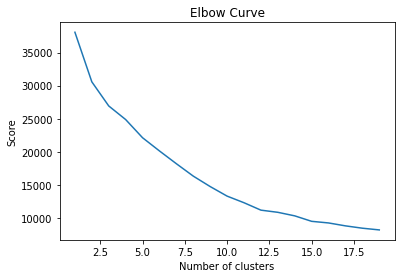

In [17]:
SSE = []
for i in range(1,20):
    kmeans = KMeans(n_clusters=i,init='k-means++',max_iter=1500,n_init=10,random_state=0)
    kmeans.fit(df_lower)
    SSE.append(kmeans.inertia_)
plt.plot(range(1,20),SSE)
plt.title('Elbow Curve')
plt.xlabel('Number of clusters')
plt.ylabel('Score')
plt.show()

In [18]:
kmeans_lower = KMeans(n_clusters=12, random_state=42).fit(df_lower_standardscalar)
labels_lower = kmeans.labels_

In [19]:
df_lower['label_kmeans'] = labels_lower
df_lower

,t_floral,t_stripe,t_dot,f_denim,f_leather,f_cotton,f_knit,f_pleated,s_fit,s_pencil,s_midi,s_mini,s_maxi,p_zipper,label_kmeans
0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,14
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2
3,0,0,0,0,0,0,0,0,0,0,0,1,0,0,15
4,0,0,0,1,0,0,0,0,0,0,0,1,0,0,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58958,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2
58959,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2
58960,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2
58961,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [20]:
centers_lower = kmeans_lower.cluster_centers_

In [21]:
reduced_data_lower = PCA(n_components=2).fit_transform(df_lower_standardscalar)
principalDf_lower = pd.DataFrame(data = reduced_data_lower
             , columns = ['principal component 1', 'principal component 2'])
principalDf_lower

,principal component 1,principal component 2
0,2.012693,0.922317
1,-0.240113,-0.161475
2,-1.581141,-0.347183
3,0.867345,0.423879
4,-0.473683,0.238171
...,...,...
58958,-1.581141,-0.347183
58959,-1.581141,-0.347183
58960,-1.581141,-0.347183
58961,-0.240113,-0.161475


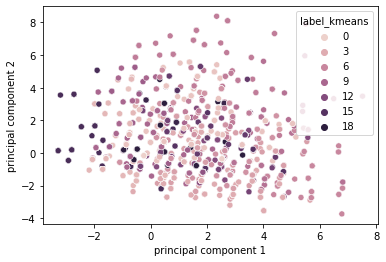

In [22]:
sns.scatterplot(x="principal component 1", y="principal component 2", hue=df_lower['label_kmeans'], data=principalDf_lower)

### Top bottom rating table

In [23]:
userrating = []

for i in range(0,100):
    x = random.randint(1,5)
    userrating.append(x)

top=[]
bottom=[]
for i in range(0,100):
    x = random.randint(1,139704)
    top.append(x)
    y = random.randint(1,139704)
    bottom.append(y)

In [24]:
df_top_bottom_rating = pd.DataFrame({'top': pd.Series(top), 'bottom': pd.Series(bottom), 'itemRating':pd.Series(userrating)})
df_top_bottom_rating

,top,bottom,itemRating
0,111974,88671,5
1,103793,33735,2
2,87481,120858,2
3,63878,8227,3
4,132052,37700,3
...,...,...,...
95,21827,113768,2
96,106020,3134,5
97,139536,53549,4
98,115920,54366,5


In [25]:
for i, j in df_top_bottom_rating["top"].iteritems():
    df_top_bottom_rating["topClusterRating"]=df_upper["label_kmeans"]

In [26]:
for i, j in df_top_bottom_rating["bottom"].iteritems():
    df_top_bottom_rating["bottomClusterRating"]=df_lower["label_kmeans"]

## Cluster mapping

In [27]:
df_top_bottom_rating

,top,bottom,itemRating,topClusterRating,bottomClusterRating
0,111974,88671,5,1,14
1,103793,33735,2,1,0
2,87481,120858,2,11,2
3,63878,8227,3,1,15
4,132052,37700,3,1,18
...,...,...,...,...,...
95,21827,113768,2,1,0
96,106020,3134,5,1,0
97,139536,53549,4,1,0
98,115920,54366,5,1,2


In [28]:
cluster_mapping=df_top_bottom_rating[["topClusterRating", "bottomClusterRating", "itemRating"]]
cluster_mapping

,topClusterRating,bottomClusterRating,itemRating
0,1,14,5
1,1,0,2
2,11,2,2
3,1,15,3
4,1,18,3
...,...,...,...
95,1,0,2
96,1,0,5
97,1,0,4
98,1,2,5


In [29]:
cluster_mapping_average=cluster_mapping.groupby(['topClusterRating','bottomClusterRating'])['itemRating'].mean().reset_index()
cluster_mapping_average=pd.DataFrame(cluster_mapping_average)
cluster_mapping_average

,topClusterRating,bottomClusterRating,itemRating
0,0,14,4.000000
1,1,0,2.517241
2,1,1,2.000000
3,1,2,3.272727
4,1,3,3.000000
5,1,7,3.000000
6,1,10,1.000000
7,1,14,4.076923
8,1,15,2.666667
9,1,16,4.000000


## Collaborative Filtering

In [30]:
cluster_mapping_average=cluster_mapping.groupby(['topClusterRating','bottomClusterRating'])['itemRating'].mean().reset_index()
cluster_mapping_average=pd.DataFrame(cluster_mapping_average)
cluster_mapping_average

,topClusterRating,bottomClusterRating,itemRating
0,0,14,4.000000
1,1,0,2.517241
2,1,1,2.000000
3,1,2,3.272727
4,1,3,3.000000
5,1,7,3.000000
6,1,10,1.000000
7,1,14,4.076923
8,1,15,2.666667
9,1,16,4.000000


In [31]:
X = cluster_mapping_average[['topClusterRating', 'bottomClusterRating', 'itemRating']]
y = cluster_mapping_average['topClusterRating']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=42)
X_train

,topClusterRating,bottomClusterRating,itemRating
1,1,0,2.517241
13,2,14,1.000000
5,1,7,3.000000
2,1,1,2.000000
11,1,18,2.500000
20,10,0,3.000000
3,1,2,3.272727
4,1,3,3.000000
18,9,2,3.250000
16,6,14,4.000000


In [32]:
df_ratings = X_train.pivot(index='topClusterRating', columns='bottomClusterRating', values='itemRating')
df_ratings

bottomClusterRating,0,1,2,3,5,7,10,14,17,18
topClusterRating,,,,,,,,,,
1,2.517241,2.0,3.272727,3.0,NaN,3.0,1.0,4.076923,4.0,2.5
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN
4,4.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.000000,NaN,NaN
9,NaN,NaN,3.250000,NaN,NaN,NaN,NaN,2.000000,NaN,NaN
10,3.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11,NaN,NaN,1.500000,NaN,3.0,NaN,NaN,NaN,NaN,NaN


In [33]:
df_ratings_dummy = df_ratings.copy().fillna(0)
df_ratings_dummy.head()

bottomClusterRating,0,1,2,3,5,7,10,14,17,18
topClusterRating,,,,,,,,,,
1,2.517241,2.0,3.272727,3.0,0.0,3.0,1.0,4.076923,4.0,2.5
2,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,1.000000,0.0,0.0
4,4.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
6,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,4.000000,0.0,0.0
9,0.000000,0.0,3.250000,0.0,0.0,0.0,0.0,2.000000,0.0,0.0


In [34]:
similarity_matrix = cosine_similarity(df_ratings_dummy, df_ratings_dummy)
similarity_matrix_df = pd.DataFrame(similarity_matrix, index=df_ratings.index, columns=df_ratings.index)
similarity_matrix_df

topClusterRating,1,2,4,6,9,10,11
topClusterRating,,,,,,,
1,1.000000,0.458926,0.283358,0.458926,0.554273,0.283358,0.164754
2,0.458926,1.000000,0.000000,1.000000,0.524097,0.000000,0.000000
4,0.283358,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
6,0.458926,1.000000,0.000000,1.000000,0.524097,0.000000,0.000000
9,0.554273,0.524097,0.000000,0.524097,1.000000,0.000000,0.380873
10,0.283358,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
11,0.164754,0.000000,0.000000,0.000000,0.380873,0.000000,1.000000


In [35]:
def calculate_ratings(topClusterRating, bottomClusterRating):
    if topClusterRating in df_ratings:
        cosine_scores = similarity_matrix_df[bottomClusterRating] #similarity of bottomClusterRating with every other topClusterRating
        ratings_scores = df_ratings[topClusterRating]      #ratings of every other topClusterRating for the bottomClusterRating
        index_not_rated = ratings_scores[ratings_scores.isnull()].index
        ratings_scores = ratings_scores.dropna()
        cosine_scores = cosine_scores.drop(index_not_rated)
        ratings_cluster = np.dot(ratings_scores, cosine_scores)/cosine_scores.sum()
    else:
        return 2.5
    return ratings_cluster

###Todo create an API to get the clothing attributes

In [36]:
similar_cluster=calculate_ratings(3,10) #predicts rating for topClusterRating 3 and bottomClusterRating 10
similar_cluster= int(similar_cluster)
similar_cluster

3

In [37]:
X_train['index'] = X_train.index

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [38]:
X_train

,topClusterRating,bottomClusterRating,itemRating,index
1,1,0,2.517241,1
13,2,14,1.000000,13
5,1,7,3.000000,5
2,1,1,2.000000,2
11,1,18,2.500000,11
20,10,0,3.000000,20
3,1,2,3.272727,3
4,1,3,3.000000,4
18,9,2,3.250000,18
16,6,14,4.000000,16


## Prediction

In [39]:
predictedItem=X_train.loc[X_train['index'] == similar_cluster]
predictedItem

,topClusterRating,bottomClusterRating,itemRating,index
3,1,2,3.272727,3


In [40]:
predictedtopCluster=predictedItem['topClusterRating']
predictedbottomCluster=predictedItem['bottomClusterRating']
predictedtopCluster=predictedtopCluster.reset_index(drop=True)
predictedbottomCluster=predictedbottomCluster.reset_index(drop=True)

predictedtopCluster

0    1
Name: topClusterRating, dtype: int64

In [41]:
df_top_bottom_rating
df_top_bottom_rating=df_top_bottom_rating.loc[(df_top_bottom_rating['topClusterRating']==predictedtopCluster[0]) & (df_top_bottom_rating['bottomClusterRating']==predictedbottomCluster[0])]
df_top_bottom_rating.head(1)

,top,bottom,itemRating,topClusterRating,bottomClusterRating
9,109036,13825,3,1,2


In [42]:
df_upper['index'] = df_upper.index

In [43]:
df_upper.loc[df_upper['index'] == 100358]

,t_floral,t_stripe,t_dot,f_lace,f_denim,f_chiffon,f_cotton,f_leather,f_fur,p_sleeveless,p_long-sleeve,p_collar,p_pocket,p_v-neck,p_button,p_hooded,p_zipper,label_kmeans,index
100358,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,100358


#### Todo : return api with these attributes

In [44]:
import pickle
filename = 'finalized_model.sav'
pickle.dump(df_top_bottom_rating, open(filename, 'wb'))

In [45]:
filename2 = 'finalized_model2.pkl'
pickle.dump(df_top_bottom_rating, open(filename2, 'wb'))